In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('Syn.csv')

In [2]:
data = data.dropna()

for column in data.columns:
    print(data[column].dtypes)
    if data[column].dtypes == np.int64:
        data[column] = data[column].astype(np.float64)

print(data.info())

data.replace('Infinity', 0, inplace=True)

int64
object
object
int64
object
int64
int64
object
int64
int64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
float64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
float64
float64
object
int64
object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1380404 entries, 0 to 1582680
Data columns (total 88 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Unnamed: 0                    1380404 non-null  float64
 1   Flow ID                       1380404 non-null  object 
 2    Source IP    

<AxesSubplot:xlabel=' Label', ylabel='Init_Win_bytes_forward'>

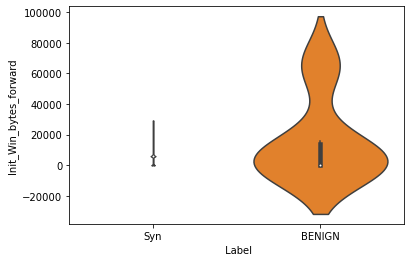

In [3]:
# Plotting data to see relations with survivability
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots()
# sns.pointplot(x=" Flow Packets/s", y="Init_Win_bytes_forward", hue=" Label", data=data[:1000])
sns.violinplot(x=" Label", y="Init_Win_bytes_forward", data=data[:100000])

In [4]:
# Making variables numeric so we can check correlations and checking for correlations.

data.replace({'Syn': 1, 'BENIGN': 0}, inplace=True)
data.corr().abs()[[" Label"]]

,Label
Unnamed: 0,0.009113
Source Port,0.008548
Destination Port,0.019684
Protocol,0.295087
Flow Duration,0.000094
...,...
Idle Std,0.002039
Idle Max,0.007345
Idle Min,0.021451
Inbound,0.722234


In [5]:
# The dataset is ready so we can start to create a model!
from sklearn.model_selection import train_test_split

try:
    data = data.drop(['Flow ID',' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Timestamp', 'SimillarHTTP'],axis=1)
    data = data.reset_index()
except:
    None

x_train, x_test, y_train, y_test = train_test_split(data[:1000000], data[:1000000][' Label'], test_size=0.2, random_state=0) # Splits data into training and testing

In [6]:
# Normalise the data so its treated fairly! (e.g. Age is 0-100, Gender is 0-1)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

ValueError: Input contains infinity or a value too large for dtype('float64').

In [ ]:
# Using Native Bayes algorithm as its a classification classic (chart to choose right one https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
model.fit(X_train, y_train)

In [ ]:
predicted = model.predict(X_test)

In [ ]:
# Testing trained model against the data set
from sklearn import metrics

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Next we use Neural Networks to increase accuracy! In this case a Sequential neural network (layered network with layers that feed into each other)
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()


In [ ]:
# Adding layers to the network. Relu activation function is a good activation function for the first 2 layers, but we want to use sigmoid activiation function for the last layer as it needs to be scaled in the range 0-1 (probability)

model.add(Dense(10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 80)) # Dimension of 80 as inputs sex, pclass, age, relatives, and fare.
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid')) # Dimension of 1 as we want a 1-d output indicating survival

model.summary()

In [ ]:
# Define the optimizer, how loss is calculated and what metric it should be optimized for.

model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

In [ ]:
# Testing trained model against the data set

y_pred = model.predict_classes(X_test)
print(metrics.accuracy_score(y_test, y_pred))